In [3]:
import requests
from tqdm import tqdm

%matplotlib inline
import seaborn as sns
import numpy as np

## Starting with the dictionary generated in part 2

In [81]:
phenos = {'NCBIGene:100040608': [],
 'NCBIGene:100360594': [],
 'NCBIGene:104806': ['HP:0000027',
  'HP:0000137',
  'HP:0008734',
  'HP:0010791',
  'MP:0002020',
  'MP:0002083',
  'MP:0002216',
  'MP:0002682',
  'MP:0003701',
  'MP:0004179',
  'MP:0005397',
  'MP:0006378',
  'MP:0010264'],
 'NCBIGene:12190': ['GO:0000724PHENOTYPE',
  'GO:0001556PHENOTYPE',
  'GO:0001833PHENOTYPE',
  'GO:0006302PHENOTYPE',
  'GO:0007141PHENOTYPE',
  'GO:0007283PHENOTYPE',
  'GO:0007569PHENOTYPE',
  'GO:0008283PHENOTYPE',
  'GO:0008585PHENOTYPE',
  'GO:0010165PHENOTYPE',
  'GO:0010332PHENOTYPE',
  'GO:0030097PHENOTYPE',
  'GO:0043009PHENOTYPE',
  'GO:0051276PHENOTYPE',
  'HP:0000027',
  'HP:0000134',
  'HP:0000772',
  'HP:0001738',
  'HP:0001871',
  'HP:0002664',
  'HP:0002665',
  'HP:0003251',
  'HP:0003254',
  'HP:0004325',
  'HP:0006270',
  'HP:0008222',
  'HP:0008734',
  'HP:0009121',
  'HP:0011017',
  'HP:0011121',
  'HP:0011124',
  'HP:0030731',
  'HP:0040012',
  'HP:0100806',
  'MP:0000157',
  'MP:0000333',
  'MP:0000585',
  'MP:0000662',
  'MP:0000929',
  'MP:0001158',
  'MP:0001231',
  'MP:0001236',
  'MP:0001241',
  'MP:0001606',
  'MP:0001672',
  'MP:0001698',
  'MP:0001718',
  'MP:0001883',
  'MP:0002020',
  'MP:0002024',
  'MP:0002052',
  'MP:0002066',
  'MP:0002083',
  'MP:0002084',
  'MP:0002085',
  'MP:0002086',
  'MP:0002169',
  'MP:0002777',
  'MP:0003607',
  'MP:0003631',
  'MP:0003702',
  'MP:0003984',
  'MP:0003992',
  'MP:0004024',
  'MP:0004046',
  'MP:0004201',
  'MP:0004502',
  'MP:0004556',
  'MP:0004806',
  'MP:0004955',
  'MP:0005029',
  'MP:0005378',
  'MP:0005384',
  'MP:0005387',
  'MP:0005389',
  'MP:0006042',
  'MP:0006413',
  'MP:0008008',
  'MP:0008770',
  'MP:0008813',
  'MP:0008866',
  'MP:0008943',
  'MP:0009078',
  'MP:0009219',
  'MP:0009431',
  'MP:0009674',
  'MP:0010299',
  'MP:0010308',
  'MP:0010948',
  'MP:0011086',
  'MP:0011088',
  'MP:0011090',
  'MP:0011091',
  'MP:0011092',
  'MP:0011097',
  'MP:0011098',
  'MP:0011101',
  'MP:0011108',
  'MP:0011109',
  'MP:0011197',
  'MP:0011704',
  'MP:0013236'],
 'NCBIGene:14087': ['GO:0007140PHENOTYPE',
  'GO:0008584PHENOTYPE',
  'GO:0008585PHENOTYPE',
  'GO:0042127PHENOTYPE',
  'GO:0050727PHENOTYPE',
  'GO:0051090PHENOTYPE',
  'HP:0000134',
  'HP:0000135',
  'HP:0000137',
  'HP:0000138',
  'HP:0000568',
  'HP:0001508',
  'HP:0001873',
  'HP:0002664',
  'HP:0004325',
  'HP:0005518',
  'HP:0008669',
  'HP:0008724',
  'HP:0008734',
  'HP:0010791',
  'HP:0011017',
  'HP:0040012',
  'MP:0000438',
  'MP:0001153',
  'MP:0001154',
  'MP:0001922',
  'MP:0001923',
  'MP:0001935',
  'MP:0002209',
  'MP:0002682',
  'MP:0002777',
  'MP:0003702',
  'MP:0003984',
  'MP:0004029',
  'MP:0004030',
  'MP:0004834',
  'MP:0004852',
  'MP:0005169',
  'MP:0005390',
  'MP:0005391',
  'MP:0008280',
  'MP:0008873',
  'MP:0008943',
  'MP:0008995'],
 'NCBIGene:14088': ['GO:0002262PHENOTYPE',
  'GO:0007276PHENOTYPE',
  'GO:0007281PHENOTYPE',
  'HP:0000013',
  'HP:0000029',
  'HP:0000134',
  'HP:0000137',
  'HP:0000798',
  'HP:0001873',
  'HP:0003251',
  'HP:0008222',
  'HP:0008724',
  'HP:0012243',
  'MP:0000239',
  'MP:0001129',
  'MP:0001134',
  'MP:0001154',
  'MP:0001155',
  'MP:0001545',
  'MP:0001921',
  'MP:0001923',
  'MP:0001935',
  'MP:0002161',
  'MP:0002209',
  'MP:0002216',
  'MP:0002777',
  'MP:0003155',
  'MP:0004029',
  'MP:0004030',
  'MP:0004045',
  'MP:0004852',
  'MP:0005397',
  'MP:0005431',
  'MP:0008249',
  'MP:0008404',
  'MP:0008813',
  'MP:0010763'],
 'NCBIGene:208836': ['MP:0011110'],
 'NCBIGene:211651': ['GO:0006974PHENOTYPE',
  'GO:0007129PHENOTYPE',
  'GO:0007276PHENOTYPE',
  'GO:0050727PHENOTYPE',
  'GO:0051090PHENOTYPE',
  'HP:0000568',
  'HP:0000789',
  'HP:0000798',
  'HP:0001508',
  'HP:0004325',
  'HP:0008734',
  'HP:0030731',
  'HP:0040006',
  'MP:0002216',
  'MP:0002682',
  'MP:0004201',
  'MP:0004810',
  'MP:0005169',
  'MP:0006379',
  'MP:0008873',
  'MP:0008943',
  'MP:0010383',
  'MP:0011090'],
 'NCBIGene:2175': ['EFO:0003924',
  'EFO:0003963',
  'HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000081',
  'HP:0000083',
  'HP:0000085',
  'HP:0000086',
  'HP:0000104',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000815',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0000957',
  'HP:0000978',
  'HP:0001000',
  'HP:0001009',
  'HP:0001017',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001518',
  'HP:0001537',
  'HP:0001562',
  'HP:0001627',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001896',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003213',
  'HP:0003214',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0003974',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0009943',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2176': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000081',
  'HP:0000083',
  'HP:0000085',
  'HP:0000086',
  'HP:0000104',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000815',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0000957',
  'HP:0000978',
  'HP:0001000',
  'HP:0001009',
  'HP:0001017',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001518',
  'HP:0001537',
  'HP:0001562',
  'HP:0001627',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001896',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003213',
  'HP:0003214',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0003974',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0009943',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2177': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000081',
  'HP:0000083',
  'HP:0000085',
  'HP:0000086',
  'HP:0000104',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000815',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0000957',
  'HP:0000978',
  'HP:0001000',
  'HP:0001009',
  'HP:0001017',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001518',
  'HP:0001537',
  'HP:0001562',
  'HP:0001627',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001896',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003213',
  'HP:0003214',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0003974',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0009943',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2178': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000081',
  'HP:0000083',
  'HP:0000085',
  'HP:0000086',
  'HP:0000104',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000815',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0000957',
  'HP:0000978',
  'HP:0001000',
  'HP:0001009',
  'HP:0001017',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001518',
  'HP:0001537',
  'HP:0001562',
  'HP:0001627',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001896',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003213',
  'HP:0003214',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0003974',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0009943',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2187': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000089',
  'HP:0000104',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000369',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001627',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002093',
  'HP:0002101',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002410',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0003468',
  'HP:0003826',
  'HP:0003974',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2188': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:2189': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:237211': ['HP:0000798',
  'HP:0001508',
  'HP:0003251',
  'HP:0008734',
  'MP:0001153',
  'MP:0001154',
  'MP:0001265',
  'MP:0002776',
  'MP:0004901',
  'MP:0006378',
  'MP:0006380',
  'MP:0008280',
  'MP:0008392',
  'MP:0010948'],
 'NCBIGene:24361': [],
 'NCBIGene:29089': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009778',
  'HP:0009942',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:305600': [],
 'NCBIGene:309643': [],
 'NCBIGene:312641': [],
 'NCBIGene:360254': [],
 'NCBIGene:360847': [],
 'NCBIGene:361435': [],
 'NCBIGene:499155': [],
 'NCBIGene:501552': [],
 'NCBIGene:55120': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000054',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000089',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000431',
  'HP:0000453',
  'HP:0000463',
  'HP:0000470',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0000957',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0001999',
  'HP:0002007',
  'HP:0002023',
  'HP:0002032',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005280',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008551',
  'HP:0008572',
  'HP:0008678',
  'HP:0009777',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:55215': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012210',
  'HP:0012745',
  'HP:0030680',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:57697': ['HP:0000010',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000789',
  'HP:0000813',
  'HP:0000824',
  'HP:0000864',
  'HP:0000953',
  'HP:0001000',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001510',
  'HP:0001511',
  'HP:0001537',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002023',
  'HP:0002119',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002575',
  'HP:0002650',
  'HP:0002721',
  'HP:0002823',
  'HP:0002827',
  'HP:0002860',
  'HP:0002863',
  'HP:0003002',
  'HP:0003022',
  'HP:0003125',
  'HP:0003220',
  'HP:0003254',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0009778',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0012041',
  'HP:0012745',
  'HP:0100026',
  'HP:0100542',
  'HP:0100587',
  'HP:0100608',
  'HP:0100615',
  'HP:0100760',
  'HP:0100806',
  'HP:0100867'],
 'NCBIGene:60534': ['GO:0001541PHENOTYPE',
  'GO:0006974PHENOTYPE',
  'GO:0007286PHENOTYPE',
  'GO:0009314PHENOTYPE',
  'HP:0000035',
  'HP:0000134',
  'HP:0000137',
  'HP:0000789',
  'HP:0008734',
  'HP:0010791',
  'HP:0040012',
  'MP:0001130',
  'MP:0001922',
  'MP:0001923',
  'MP:0001932',
  'MP:0002216',
  'MP:0004029',
  'MP:0004030',
  'MP:0004852'],
 'NCBIGene:67030': ['GO:0007276PHENOTYPE',
  'GO:0042127PHENOTYPE',
  'HP:0000134',
  'HP:0000138',
  'HP:0000581',
  'HP:0000798',
  'HP:0003251',
  'HP:0008222',
  'HP:0008232',
  'HP:0008734',
  'HP:0009887',
  'MP:0001119',
  'MP:0001129',
  'MP:0001927',
  'MP:0001928',
  'MP:0002216',
  'MP:0002637',
  'MP:0002680',
  'MP:0002784',
  'MP:0004806',
  'MP:0004901',
  'MP:0004930',
  'MP:0008257',
  'MP:0008390',
  'MP:0008392',
  'MP:0009009',
  'MP:0009094',
  'MP:0009226',
  'MP:0009429',
  'MP:0010124',
  'MP:0011091',
  'MP:0011098',
  'MP:0013279'],
 'NCBIGene:67196': [],
 'NCBIGene:675': ['HP:0000010',
  'HP:0000016',
  'HP:0000017',
  'HP:0000020',
  'HP:0000024',
  'HP:0000027',
  'HP:0000028',
  'HP:0000047',
  'HP:0000072',
  'HP:0000077',
  'HP:0000083',
  'HP:0000135',
  'HP:0000164',
  'HP:0000175',
  'HP:0000218',
  'HP:0000238',
  'HP:0000252',
  'HP:0000268',
  'HP:0000271',
  'HP:0000286',
  'HP:0000297',
  'HP:0000316',
  'HP:0000324',
  'HP:0000340',
  'HP:0000347',
  'HP:0000365',
  'HP:0000453',
  'HP:0000463',
  'HP:0000483',
  'HP:0000486',
  'HP:0000505',
  'HP:0000508',
  'HP:0000518',
  'HP:0000520',
  'HP:0000568',
  'HP:0000582',
  'HP:0000601',
  'HP:0000639',
  'HP:0000718',
  'HP:0000737',
  'HP:0000740',
  'HP:0000771',
  'HP:0000789',
  'HP:0000790',
  'HP:0000802',
  'HP:0000813',
  'HP:0000819',
  'HP:0000822',
  'HP:0000824',
  'HP:0000839',
  'HP:0000864',
  'HP:0000872',
  'HP:0000938',
  'HP:0000939',
  'HP:0000953',
  'HP:0000957',
  'HP:0000969',
  'HP:0000992',
  'HP:0001000',
  'HP:0001006',
  'HP:0001009',
  'HP:0001053',
  'HP:0001172',
  'HP:0001199',
  'HP:0001249',
  'HP:0001251',
  'HP:0001263',
  'HP:0001289',
  'HP:0001324',
  'HP:0001347',
  'HP:0001392',
  'HP:0001402',
  'HP:0001508',
  'HP:0001510',
  'HP:0001511',
  'HP:0001513',
  'HP:0001537',
  'HP:0001548',
  'HP:0001562',
  'HP:0001631',
  'HP:0001636',
  'HP:0001639',
  'HP:0001643',
  'HP:0001646',
  'HP:0001679',
  'HP:0001763',
  'HP:0001770',
  'HP:0001824',
  'HP:0001873',
  'HP:0001875',
  'HP:0001876',
  'HP:0001878',
  'HP:0001882',
  'HP:0001895',
  'HP:0001900',
  'HP:0001903',
  'HP:0001905',
  'HP:0001907',
  'HP:0001908',
  'HP:0001909',
  'HP:0001915',
  'HP:0001943',
  'HP:0001945',
  'HP:0001972',
  'HP:0001973',
  'HP:0002007',
  'HP:0002014',
  'HP:0002017',
  'HP:0002018',
  'HP:0002023',
  'HP:0002063',
  'HP:0002119',
  'HP:0002176',
  'HP:0002245',
  'HP:0002251',
  'HP:0002414',
  'HP:0002488',
  'HP:0002527',
  'HP:0002573',
  'HP:0002575',
  'HP:0002607',
  'HP:0002650',
  'HP:0002653',
  'HP:0002665',
  'HP:0002667',
  'HP:0002715',
  'HP:0002721',
  'HP:0002756',
  'HP:0002757',
  'HP:0002797',
  'HP:0002823',
  'HP:0002827',
  'HP:0002835',
  'HP:0002858',
  'HP:0002859',
  'HP:0002860',
  'HP:0002861',
  'HP:0002862',
  'HP:0002863',
  'HP:0002885',
  'HP:0002894',
  'HP:0002896',
  'HP:0003002',
  'HP:0003003',
  'HP:0003022',
  'HP:0003125',
  'HP:0003148',
  'HP:0003220',
  'HP:0003221',
  'HP:0003254',
  'HP:0003256',
  'HP:0003510',
  'HP:0004209',
  'HP:0004322',
  'HP:0004349',
  'HP:0004377',
  'HP:0004430',
  'HP:0004431',
  'HP:0004808',
  'HP:0004810',
  'HP:0004820',
  'HP:0004859',
  'HP:0004936',
  'HP:0005344',
  'HP:0005505',
  'HP:0005510',
  'HP:0005521',
  'HP:0005522',
  'HP:0005528',
  'HP:0005560',
  'HP:0005584',
  'HP:0006000',
  'HP:0006101',
  'HP:0006265',
  'HP:0006501',
  'HP:0006721',
  'HP:0006727',
  'HP:0006740',
  'HP:0006775',
  'HP:0006824',
  'HP:0006872',
  'HP:0007354',
  'HP:0007400',
  'HP:0007565',
  'HP:0007716',
  'HP:0007874',
  'HP:0008053',
  'HP:0008064',
  'HP:0008572',
  'HP:0008678',
  'HP:0008711',
  'HP:0009725',
  'HP:0009726',
  'HP:0009778',
  'HP:0009919',
  'HP:0010293',
  'HP:0010469',
  'HP:0010650',
  'HP:0010784',
  'HP:0010788',
  'HP:0010972',
  'HP:0011018',
  'HP:0011133',
  'HP:0011297',
  'HP:0012041',
  'HP:0012056',
  'HP:0012125',
  'HP:0012745',
  'HP:0030078',
  'HP:0100013',
  'HP:0100026',
  'HP:0100242',
  'HP:0100518',
  'HP:0100526',
  'HP:0100542',
  'HP:0100587',
  'HP:0100590',
  'HP:0100608',
  'HP:0100615',
  'HP:0100634',
  'HP:0100724',
  'HP:0100760',
  'HP:0100787',
  'HP:0100806',
  'HP:0100843',
  'HP:0100867'],
 'NCBIGene:691105': [],
 'NCBIGene:72775': []}

## Get list of human genes

In [39]:
with open('human_genes.txt') as f:
    all_human_genes = set(f.read().splitlines())

## Create a similarity matrix of human_genes by non_human_genes, based on a Jaccard similarity of the associated phenotype sets

In [20]:
all_phenotype = sorted(np.unique(np.concatenate(phenos.values())).tolist())
phenotype_idx = {b : a for a, b in enumerate(all_phenotype)}
all_gene = sorted(phenos.keys())
gene_idx = {b : a for a, b in enumerate(all_gene)}

In [41]:
human_genes = sorted([x for x in phenos.keys() if x.split('NCBIGene:')[1] in all_human_genes])
human_genes_idx = {b : a for a, b in enumerate(human_genes)}
non_human_genes = [x for x in phenos.keys() if x.split('NCBIGene:')[1] not in all_human_genes]
non_human_genes_idx = {b : a for a, b in enumerate(non_human_genes)}

In [65]:
phenos_set = {a : set(b) for a, b in phenos.items()}
def get_similarity(x,y):
    x_set = phenos_set[x]
    y_set = phenos_set[y]
    return len(x_set & y_set) / float(len(x_set | y_set))

data_ij = [(get_similarity(x,y), human_genes_idx[x], non_human_genes_idx[y]) for x in human_genes for y in non_human_genes]
data, i_list, j_list = zip(*data_ij)
data, i_list, j_list = np.array(data), np.array(i_list), np.array(j_list)
g2g = coo_matrix((data, (i_list, j_list)),
                  shape=(len(human_genes), len(non_human_genes)))
g2g = g2g.toarray()

In [74]:
g2g.min(0)

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.01153846,  0.        ,  0.01098901,
        0.        ,  0.        ,  0.00420168,  0.        ,  0.        ,
        0.        ,  0.00381679,  0.        ,  0.01485149,  0.00409836,
        0.        ,  0.        ,  0.        ])

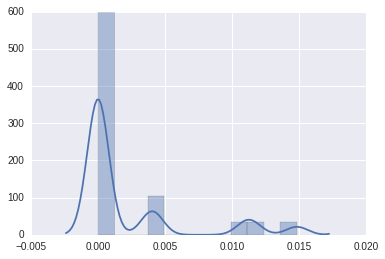

In [71]:
sns.distplot(g2g.min(0))

# Identify all non-human-genes that have a non-zero Jaccard similarity with at least one of the FA human genes

In [80]:
print 'Related non-human genes'
np.array(non_human_genes)[g2g.min(0) > 0]

Related non-human genes


array(['NCBIGene:12190', 'NCBIGene:211651', 'NCBIGene:104806',
       'NCBIGene:14088', 'NCBIGene:14087', 'NCBIGene:60534'], 
      dtype='|S18')